# Load the Dataset

In [1]:
import tensorflow as tf

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Basic Information and Statistics

In [2]:
import numpy as np

# Basic information
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
image_shape = train_images.shape[1:]

print(f"Number of training samples: {num_train_samples}")
print(f"Number of testing samples: {num_test_samples}")
print(f"Image shape: {image_shape}")

# Summary statistics
train_images_flat = train_images.reshape(num_train_samples, -1)
test_images_flat = test_images.reshape(num_test_samples, -1)

print(f"Training images - Mean: {np.mean(train_images_flat)}, Std: {np.std(train_images_flat)}")
print(f"Testing images - Mean: {np.mean(test_images_flat)}, Std: {np.std(test_images_flat)}")


Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28)
Training images - Mean: 33.318421449829934, Std: 78.56748998339798
Testing images - Mean: 33.791224489795916, Std: 79.17246322228644


# Visualize Samples

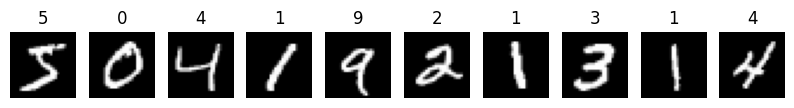

In [4]:
import matplotlib.pyplot as plt

# Function to plot sample images
def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels)


# Distribution of Classes

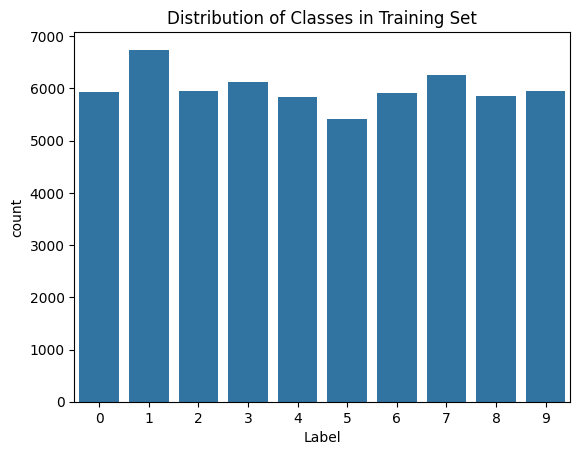

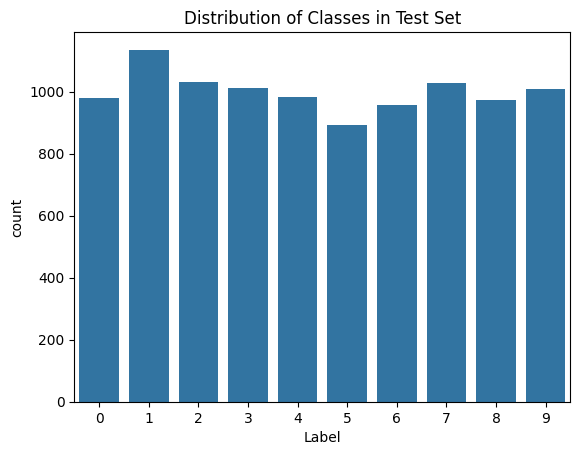

In [5]:
import seaborn as sns
import pandas as pd

# Distribution of classes in training set
train_labels_df = pd.DataFrame(train_labels, columns=['Label'])
sns.countplot(x='Label', data=train_labels_df)
plt.title("Distribution of Classes in Training Set")
plt.show()

# Distribution of classes in test set
test_labels_df = pd.DataFrame(test_labels, columns=['Label'])
sns.countplot(x='Label', data=test_labels_df)
plt.title("Distribution of Classes in Test Set")
plt.show()

# Pixel Intensity Distribution

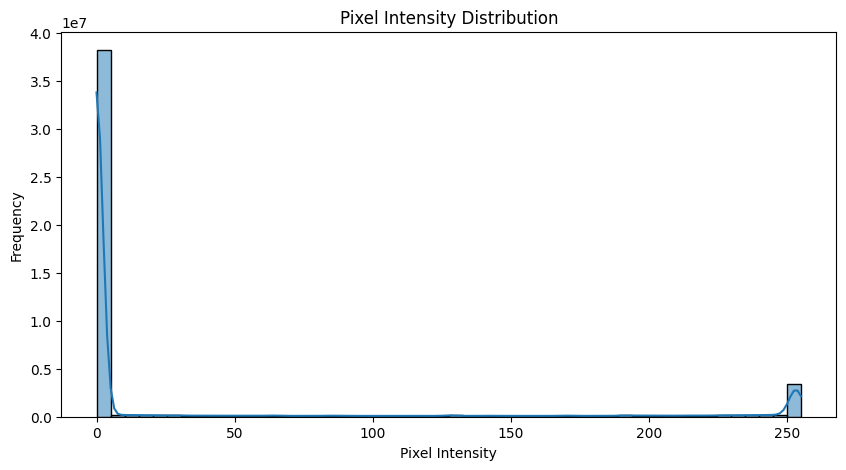

In [7]:
# Function to plot pixel intensity distribution
def plot_pixel_intensity_distribution(images):
    plt.figure(figsize=(10, 5))
    pixels = images.reshape(-1)
    sns.histplot(pixels, bins=50, kde=True)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_intensity_distribution(train_images)

# Correlation Heatmap

c:\Users\phanh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\phanh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


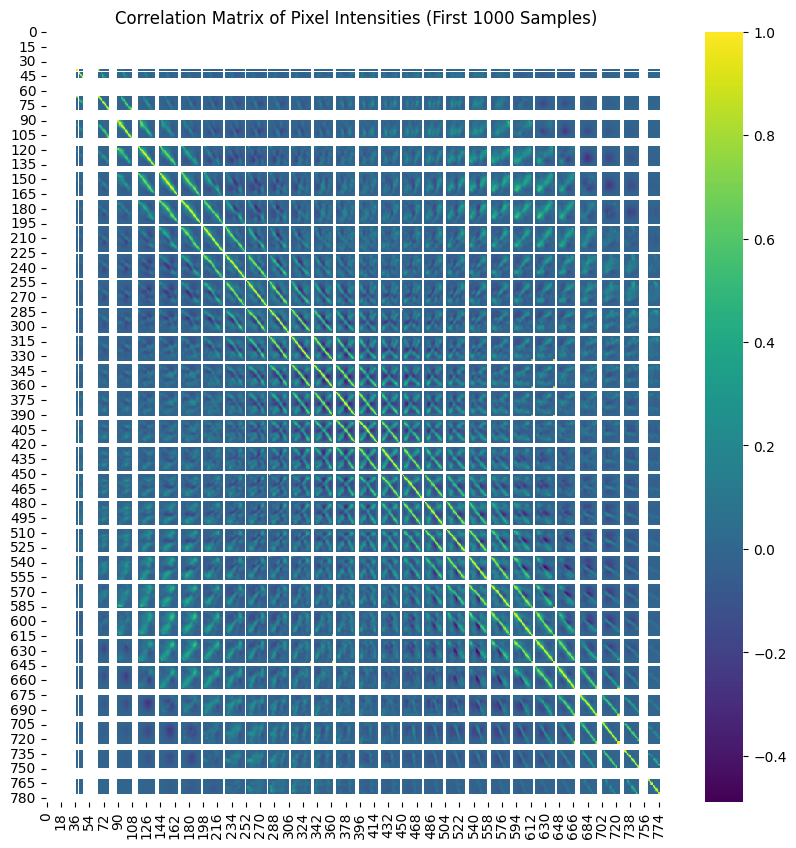

In [8]:
# Calculate the correlation matrix for the first 1000 training images
num_samples_for_corr = 1000
sample_images_flat = train_images[:num_samples_for_corr].reshape(num_samples_for_corr, -1)

correlation_matrix = np.corrcoef(sample_images_flat, rowvar=False)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title("Correlation Matrix of Pixel Intensities (First 1000 Samples)")
plt.show()

# Class-wise Mean Images

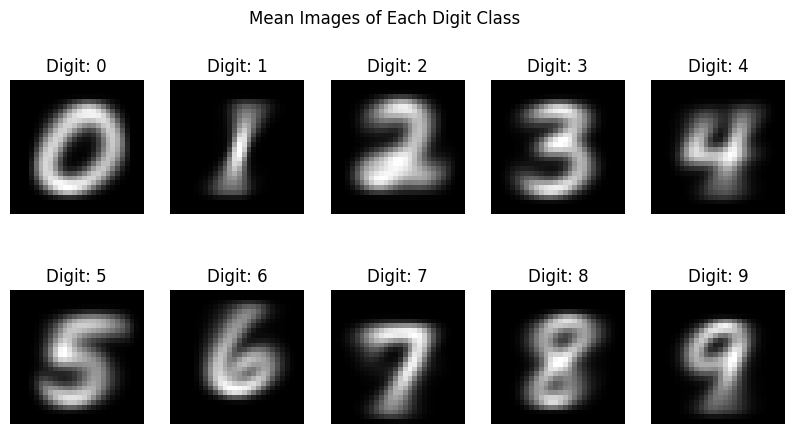

In [9]:
# Calculate and plot the mean image for each class
mean_images = []
for i in range(10):
    mean_image = np.mean(train_images[train_labels == i], axis=0)
    mean_images.append(mean_image)

# Plot the mean images
plt.figure(figsize=(10, 5))
for i, mean_image in enumerate(mean_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Digit: {i}")
    plt.axis('off')
plt.suptitle("Mean Images of Each Digit Class")
plt.show()


# Principal Component Analysis (PCA)

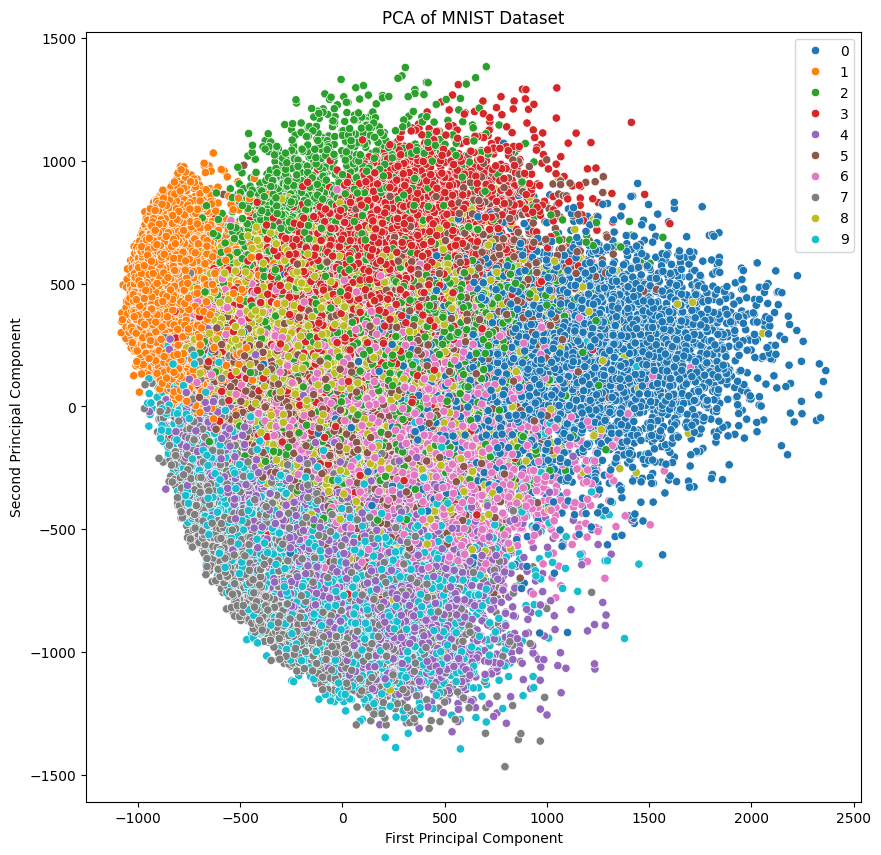

In [10]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
train_images_flat = train_images.reshape(num_train_samples, -1)
pca_result = pca.fit_transform(train_images_flat)

# Plot the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=train_labels, palette='tab10', legend='full')
plt.title("PCA of MNIST Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc='upper right')
plt.show()
